In [1]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette()

In [3]:
note_meta = pd.read_csv('/wynton/protected/project/outcome_pred/Harry_Social_Notes/data/social_notes_meta.csv', index_col=0)

/wynton/protected/home/ichs/harrysun/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
notes = pd.read_csv('/wynton/protected/project/outcome_pred/Harry_Social_Notes/data/social_notes.csv', index_col=0)

In [6]:
num_list = []
cate_list = []
pool = note_meta['note_type'].tolist()
for i in set(note_meta['note_type']):
    num = pool.count(i)
    cate_list.append(i)
    num_list.append(num)

d = {'Category': cate_list, 'Cases': num_list}
df = pd.DataFrame(data=d)
df = df.sort_values(['Cases'], ascending=False)

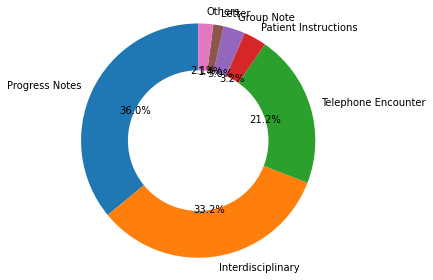

In [42]:
# Pie chart
labels = ['Progress Notes','Interdisciplinary',
         'Telephone Encounter', 'Patient Instructions', 'Group Note',
         'Letter', 'Others']
sizes = [380829, 351600,224629,33428,
         31979,14932, 21928]
#colors
colors = [sns.color_palette("tab10")[0],
         sns.color_palette("tab10")[1],
         sns.color_palette("tab10")[2],
         sns.color_palette("tab10")[3],
         sns.color_palette("tab10")[4],
         sns.color_palette("tab10")[5],
         sns.color_palette("tab10")[6]]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
#plt.show()
plt.savefig("./Results/piechart.pdf")

In [11]:

counts = pd.Series( index=list(range(len(set(note_meta['deid_PatientDurableKey'])))))
d = {'ID': list(range(len(set(note_meta['deid_PatientDurableKey']))))}
df = pd.DataFrame(data=d)
df['string'] = list(set(note_meta['deid_PatientDurableKey']))

def count_string(str_):
    return list(set(note_meta['deid_PatientDurableKey'])).count(str_)

df['counts'] = df['string'].apply(count_string)

ID_list = note_meta['deid_PatientDurableKey'].tolist()
num_list = []
ID = set(note_meta['deid_PatientDurableKey'])


p = 0
for _id in ID:
    p = p + 1
    num_list.append(ID_list.count(_id))

/wynton/protected/home/ichs/harrysun/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
181639   NaN
181640   NaN
181641   NaN
181642   NaN
181643   NaN
Length: 181644, dtype: float64

In [32]:
data = {'PatientDurableKey' : list(set(note_meta['deid_PatientDurableKey'])), 'Num_of_note' : num_list}

In [33]:

df = pd.DataFrame.from_dict(data)

In [35]:
df.to_csv("../Social_topic_modeling/ID_num.csv")

In [20]:
# loop over dictionary keys and values
for key, val in dict.items():
    print(key)
    print(val)
    break
    # write every key and value to file
    w.writerow([key, val])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
num_df = pd.DataFrame(num_list, columns=['num'])


lg_num_list = [np.log10(x+1) for x in num_list]
lg_num_df = pd.DataFrame(lg_num_list, columns=['num'])



NameError: name 'num_list' is not defined

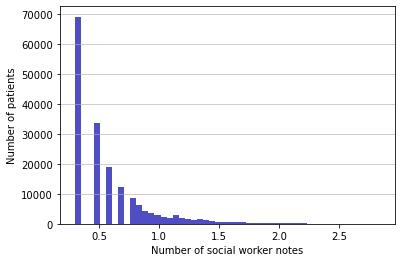

In [72]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=lg_num_list, bins=50, color='#0504aa',
                            alpha=0.7, rwidth=2)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of social worker notes')
plt.ylabel('Number of patients')
#plt.title('My Very Own Histogram')

#maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

plt.savefig('../Social_topic_modeling/Results/Hisgram.pdf')

/usr/local/icsoftware/anaconda3/envs/jupyterhub_base_v1.5/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

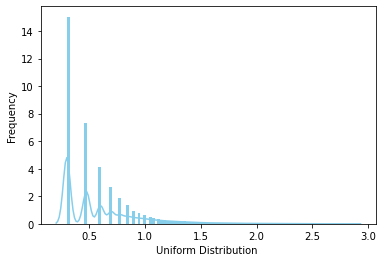

In [70]:
import seaborn as sns

ax = sns.distplot(lg_num_list,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

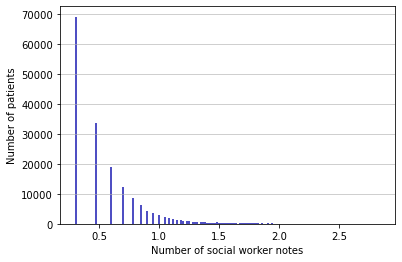

In [64]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=lg_num_list, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=2)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of social worker notes')
plt.ylabel('Number of patients')
#plt.title('My Very Own Histogram')

#maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()
#plt.savefig('../Figures/histgram.pdf')

In [62]:
max(num_list)

683

In [1]:
## Generate the summary heatmap 

In [1]:
import pandas as pd

In [23]:
tsv = pd.read_csv('../Social_topic_modeling/Results/Fig4_table.csv', index_col=0)


In [24]:
tsv

,Progess Notes,Interdisciplinary,TelePhoneEncounter,Patient Intructions,Group Note
Mental Health,4.324580,3.443899,6.035109,14.720321,1.147187
Consultation/Appontment,2.621675,0.320716,2.955506,15.933321,0.000000
Family,6.285167,12.738291,8.084296,1.024329,0.166885
Group session,4.049477,0.000000,1.885065,0.000000,24.689060
Risk of death,2.026647,0.248461,0.000000,2.685250,1.101788
clinician/hospital/Medication,8.399645,2.212605,7.562768,36.226793,0.000000
Living condition/Life Style/income,0.000000,0.632943,3.931288,10.247149,0.000206
Social support,10.457689,11.162238,11.562631,0.679342,0.132972
Phone call/Online,1.198648,0.000000,7.471413,0.430320,12.713998
Abuse history,0.000000,1.158522,0.000000,2.140001,0.000000


In [4]:
tsv.to_numpy().shape


(12, 5)

In [17]:
tsv.columns

Index(['All Notes', 'Progess Notes', 'Interdisciplinary', 'TelePhoneEncounter',
       'Patient Intructions', 'Group Note'],
      dtype='object')

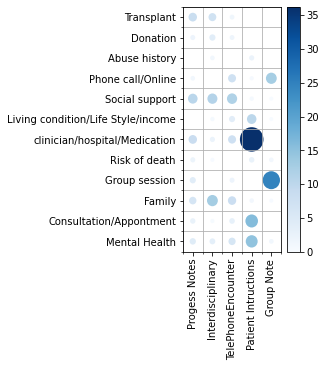

In [27]:
tsv = pd.read_csv('../Social_topic_modeling/Results/Fig4_table.csv', index_col=0)
tsv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure



N = 12
M = 5
ylabels = tsv.index
xlabels = tsv.columns

x, y = np.meshgrid(np.arange(M), np.arange(N))
c = tsv.to_numpy()

fig, ax = plt.subplots()
fig.set_size_inches(2.2, 4.5, forward=True)
#r = c/c.max()/2
R = c/c.max()/2 +0.1
R[R==0.1] =0
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="Blues")
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
plt.xticks(rotation = 90)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')

fig.colorbar(col)
#plt.show()
plt.savefig('./Results/Heatmap.pdf')

In [52]:
tsv

,All Notes,Progess Notes,Interdisciplinary,TelePhoneEncounter,Patient Intructions,Group Note
Mental health,7.041281,6.247626,5.442521,6.687962,10.019111,2.254954
Consultation/Appontment,4.479132,12.912075,0.000000,3.357207,15.895025,14.479697
Family,4.566558,6.013979,14.595498,4.223691,8.322369,0.000000
Group session,3.748897,5.286283,0.000000,0.000000,10.891846,39.181367
Risk of death,3.679088,0.000000,0.805627,0.000000,3.242098,0.000000
clinician/hospital/Medication,3.706646,4.273351,3.223352,2.341618,37.243445,1.742223
Living condition/Life Style,0.700888,0.000000,2.187093,5.231161,0.000000,0.000000
Social support,15.962342,8.930479,10.308070,16.912125,3.327791,1.472914
Phone call,17.258488,0.000000,10.923763,17.392871,0.000000,0.000000
Abuse history,7.274432,5.325136,0.000000,0.000000,0.000000,0.000000


In [27]:
r = c/c.max()/2 +100
r

array([[100.08985496, 100.079727  , 100.06945292, 100.0853462 ,
        100.12785555, 100.02877584],
       [100.05715895, 100.16477316, 100.        , 100.04284188,
        100.20283908, 100.18477785],
       [100.05827461, 100.0767454 , 100.1862556 , 100.05389923,
        100.10620315, 100.        ],
       [100.0478403 , 100.06745914, 100.        , 100.        ,
        100.13899267, 100.5       ],
       [100.04694946, 100.        , 100.01028074, 100.        ,
        100.04137295, 100.        ],
       [100.04730113, 100.05453295, 100.04113373, 100.02988178,
        100.47526986, 100.0222328 ],
       [100.00894415, 100.        , 100.02790986, 100.06675573,
        100.        , 100.        ],
       [100.20369813, 100.11396335, 100.13154302, 100.21581846,
        100.0424665 , 100.0187961 ],
       [100.22023845, 100.        , 100.13939997, 100.22195335,
        100.        , 100.        ],
       [100.09283025, 100.06795496, 100.        , 100.        ,
        100.        , 100. 